In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
import os

#plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
data = ('nyc-jobs.csv')
jobs = pd.read_csv(data)
jobs.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-08-20T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-08-20T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-08-20T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-08-20T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-08-20T00:00:00.000


## Data Dictionary

In [3]:
my_dict = ('Book1.csv')
cars_data_dict = pd.read_csv(my_dict, sep=',', index_col='Column Name')
pd.set_option('display.max_colwidth', -1)
display(cars_data_dict)
pd.reset_option('display.max_colwidth', -1)

,"Column Description (including the unit of measure, acronyms and range of possible values)",Expected Values
Column Name,,
Job ID,The job opening identification (“Job ID”) number that corresponds to and represents a job posting notice published on behalf of a New York City agency.,Plain Text
Agency,Name of the New York City agency (“agency” or “hiring agency”) where a job vacancy exists.,Plain Text
Posting Type,Identifies whether a job posting is an Internal or External posting. Internal postings are available to City employees only and external postings are available to the general public.,Plain Text
# Of Positions,The total number of vacancies to be filled under the job ID listed.,Number
Business Title,"The ""business title"", or ""office title"", for the job posting listed.",Plain Text
Civil Service Title,The civil service title for the job posting listed.,Plain Text
Title Code No.,The Title Code Number (“Title Code No.”) that corresponds to the civil service title posted.,Number
Level,The civil service title assignment level that the posted position is being filled at. Civil service titles may have one (1) to four (4) assignment levels which correspond to the work duties assigned to that position.,Plain Text
Job Category,"The occupational group in which the posted job belongs, such as:\n- Administration & Human Resources\n- Communications & Intergovernmental Affairs\n- Constituent Services & Community Programs\n- Engineering, Architecture, & Planning\n- Finance, Accounting, & Procurement\n- Health\n- Technology, Data & Innovation\n- Legal Affairs\n- Building Operations & Maintenance\n- Policy, Research & Analysis\n- Public Safety, Inspections, & Enforcement\n- Social Services",Plain Text


## Exploratory Data Analysis

In [4]:
print('Data shape:\n',jobs.shape)
print('|------------------------------------------------------|')
print('Data info:\n',jobs.info())

Data shape:
 (3228, 28)
|------------------------------------------------------|
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 28 columns):
Job ID                           3228 non-null int64
Agency                           3228 non-null object
Posting Type                     3228 non-null object
# Of Positions                   3228 non-null int64
Business Title                   3228 non-null object
Civil Service Title              3228 non-null object
Title Code No                    3228 non-null object
Level                            3228 non-null object
Job Category                     3226 non-null object
Full-Time/Part-Time indicator    2941 non-null object
Salary Range From                3228 non-null float64
Salary Range To                  3228 non-null float64
Salary Frequency                 3228 non-null object
Work Location                    3228 non-null object
Division/Work Unit               3228 non-null object
Jo

In [5]:
# Drop columns unnecessary for our analysis
jobs.drop(['To Apply', 'Hours/Shift','Work Location 1','Recruitment Contact','Residency Requirement','Posting Date','Post Until'
          ,'Posting Updated','Process Date','Additional Information'], axis=1, inplace= True)

In [6]:
# Check missing values
jobs.isnull().sum()

Job ID                             0
Agency                             0
Posting Type                       0
# Of Positions                     0
Business Title                     0
Civil Service Title                0
Title Code No                      0
Level                              0
Job Category                       2
Full-Time/Part-Time indicator    287
Salary Range From                  0
Salary Range To                    0
Salary Frequency                   0
Work Location                      0
Division/Work Unit                 0
Job Description                    0
Minimum Qual Requirements         14
Preferred Skills                 424
dtype: int64

In [7]:
# show missing values by percentage
(jobs.isnull().sum()/len(jobs)*100).sort_values(ascending = False)

Preferred Skills                 13.135068
Full-Time/Part-Time indicator     8.890954
Minimum Qual Requirements         0.433705
Job Category                      0.061958
Work Location                     0.000000
Salary Frequency                  0.000000
Salary Range To                   0.000000
Salary Range From                 0.000000
Division/Work Unit                0.000000
Job Description                   0.000000
Level                             0.000000
Title Code No                     0.000000
Civil Service Title               0.000000
Business Title                    0.000000
# Of Positions                    0.000000
Posting Type                      0.000000
Agency                            0.000000
Job ID                            0.000000
dtype: float64

In [8]:
# Check for dupliacation
len(jobs[jobs.duplicated()])

36

In [9]:
# Drop dublicated postings
jobs.drop_duplicates(inplace=True, keep='first')

In [10]:
# display summary table
jobs.describe().T.style

,count,mean,std,min,25%,50%,75%,max
Job ID,3192,373253,46804.2,87990,373350,392237,399775,406986
# Of Positions,3192,2.4765,7.7975,1,1,1,1,150
Salary Range From,3192,57249.4,26802.3,0,47450,57125,71228.2,218587
Salary Range To,3192,84139.6,43938.9,10.36,60447,80000,105000,234402


## Data Correlation 

In [11]:
#Copy df for factorization
factor_job = jobs.copy()
factor_job = factor_job.dropna()
#choosing text columns
char_cols = factor_job.dtypes.pipe(lambda x: x[x == 'object']).index
#factorizing text columns
for col in char_cols:
    factor_job[col] = pd.factorize(factor_job[col])[0]

In [12]:
#Verify factoraiztion
factor_job.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills
2,132292,0,0,52,0,0,0,0,0,0,51907.68,54580.32,0,0,0,0,0,0
3,132292,0,1,52,0,0,0,0,0,0,51907.68,54580.32,0,0,0,0,0,0
6,137433,1,0,1,1,1,1,1,1,0,50598.00,85053.00,0,1,1,1,1,1
7,138531,2,0,1,2,2,2,2,2,0,50623.00,75083.00,0,2,2,2,2,2
8,151131,0,1,1,3,3,3,0,3,0,90000.00,110000.00,0,3,3,3,3,3


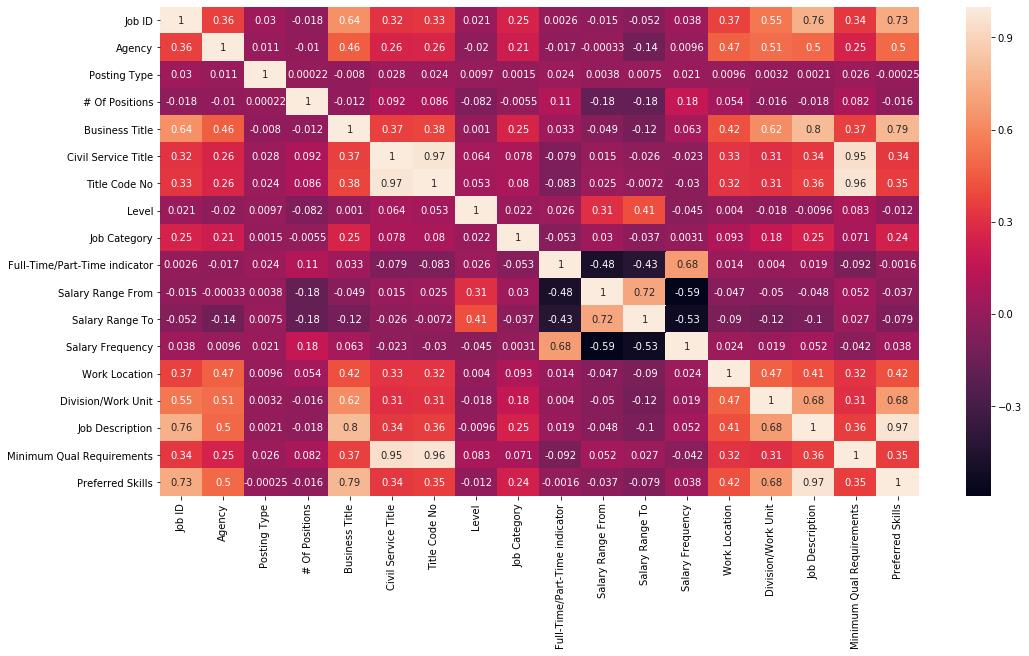

In [13]:
#Correlation heatmap
plt.figure(figsize=(17,9))
sns.heatmap(factor_job.corr(), annot=True);

## Find Most Posted Job Categories

In [14]:
jobs['Job Category'].value_counts()

Engineering, Architecture, & Planning                                                                                                                                                                        518
Technology, Data & Innovation                                                                                                                                                                                359
Building Operations & Maintenance                                                                                                                                                                            213
Legal Affairs                                                                                                                                                                                                205
Public Safety, Inspections, & Enforcement                                                                                                                           

In [15]:
categories = jobs['Job Category'].dropna().apply(lambda x: x.replace('&', ','))
categories = categories.str.split(',', expand=True).stack().str.strip().reset_index(level=1, drop=True)
categories = pd.Series(categories)
categories = categories[categories!='']

In [16]:
categories.value_counts().iloc[:50]

Architecture                            739
Engineering                             718
Planning                                525
Data                                    467
Inspections                             457
Enforcement                             449
Research                                434
Innovation                              409
Technology                              395
Analysis                                366
Administration                          291
Accounting                              284
Constituent Services                    274
Maintenance                             250
Building Operations                     236
Finance                                 218
Legal Affairs                           205
Public Safety                           202
Community Programs                      196
Health                                  174
Procurement                             173
Policy                                  154
Human Resources                 

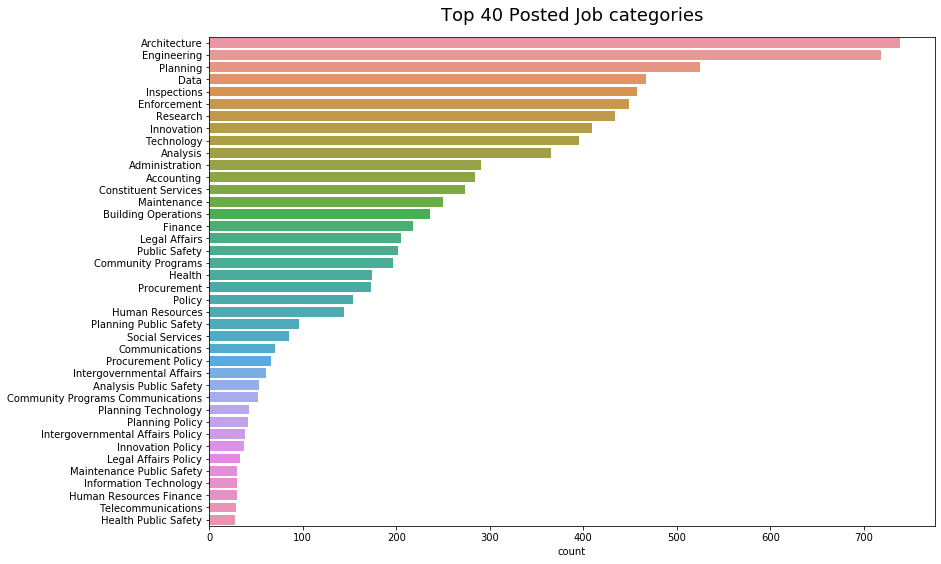

In [17]:
plt.figure(figsize=(13,9));
plt.title('Top 40 Posted Job categories', fontsize=(18), y = 1.02);
sns.countplot( y = categories, order = categories.value_counts().iloc[:40].index);

#### Defining the pie chart

In [18]:
def pie_plot(valcnts, title):
    labels = valcnts.index
    values = valcnts.values
    
    figure = go.Pie(labels=labels,
                   values=values,
                   title=title,
                   hoverinfo='label+percent', 
                    textinfo='value', 
                    textfont_size=20,
                  marker=dict( line=dict(color='#000000', width=2))
                  )
    return figure

## Posting Types

In [19]:
jobs['Posting Type'].value_counts()

Internal    1785
External    1407
Name: Posting Type, dtype: int64

In [20]:
py.iplot([pie_plot(jobs['Posting Type'].value_counts(), 'Posting Types')])

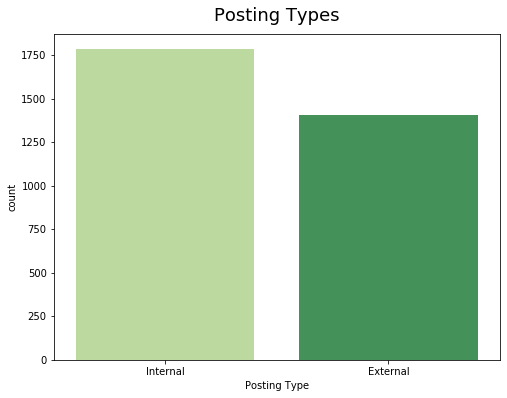

In [21]:
plt.figure(figsize=(8,6));
plt.title('Posting Types', fontsize=(18), y = 1.02);
sns.countplot(jobs['Posting Type'], palette = 'YlGn');

## Exploring Salary 

In [22]:
jobs['Salary Frequency'].value_counts()

Annual    2921
Hourly     236
Daily       35
Name: Salary Frequency, dtype: int64

In [23]:
py.iplot([pie_plot(jobs['Salary Frequency'].value_counts(), 'Salary Frequency')])

## Highest Paying Jobs (Annually, Daily, Hourly)

#### Annual

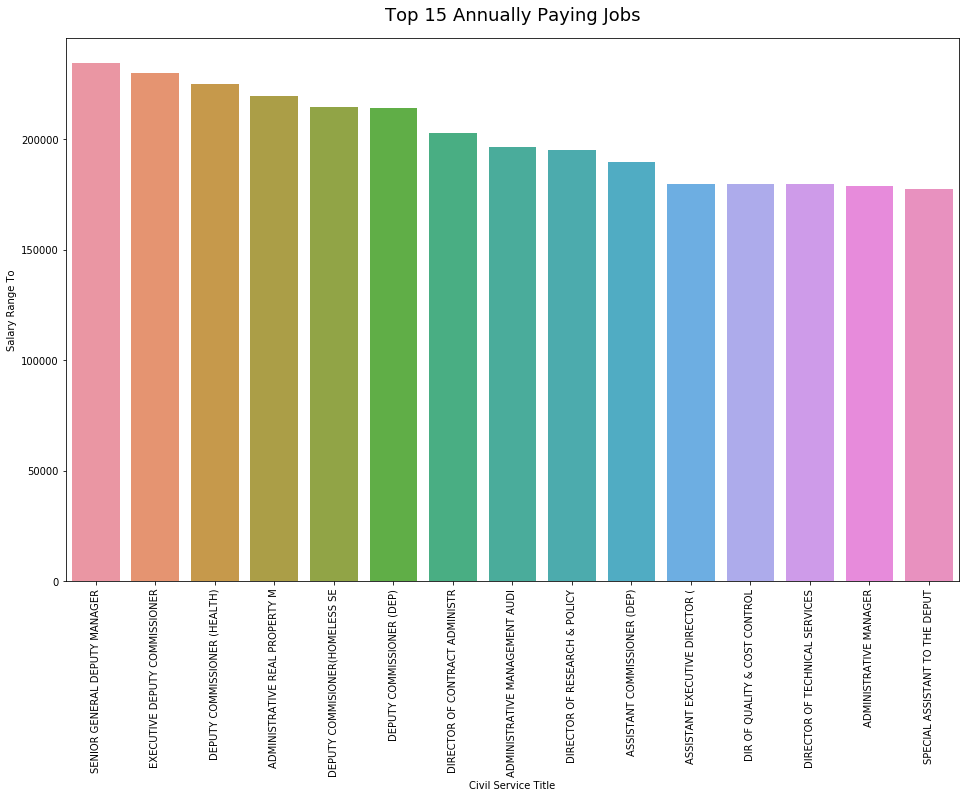

In [24]:
annual_jobs = jobs[jobs['Salary Frequency'] == 'Annual'][['Civil Service Title','Salary Range To']]\
.sort_values(by=['Salary Range To'],ascending = False)
highest_annual = pd.DataFrame(annual_jobs.groupby(['Civil Service Title'])['Salary Range To'].mean()\
                              .sort_values(ascending=False).head(15).reset_index())
plt.figure(figsize=(16,10))
plt.xticks(rotation = 90)
plt.title('Top 15 Annually Paying Jobs', fontsize=(18), y = 1.02);
sns.barplot(x='Civil Service Title', y='Salary Range To', data=highest_annual);

#### Daily 

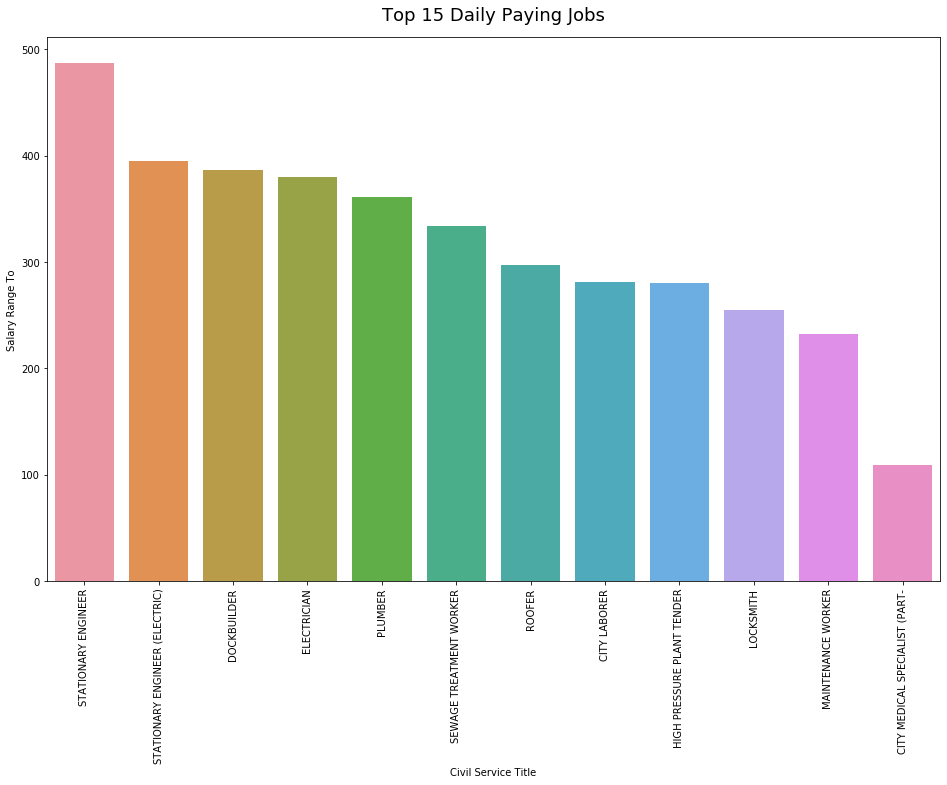

In [25]:
Daily_jobs = jobs[jobs['Salary Frequency'] == 'Daily'][['Civil Service Title','Salary Range To']]\
.sort_values(by=['Salary Range To'],ascending = False)
highest_daily = pd.DataFrame(Daily_jobs.groupby(['Civil Service Title'])['Salary Range To'].mean()\
                              .sort_values(ascending=False).head(15).reset_index())
plt.figure(figsize=(16,10))
plt.xticks(rotation = 90)
plt.title('Top 15 Daily Paying Jobs', fontsize=(18), y = 1.02);
sns.barplot(x='Civil Service Title', y='Salary Range To', data=highest_daily);

#### Hourly

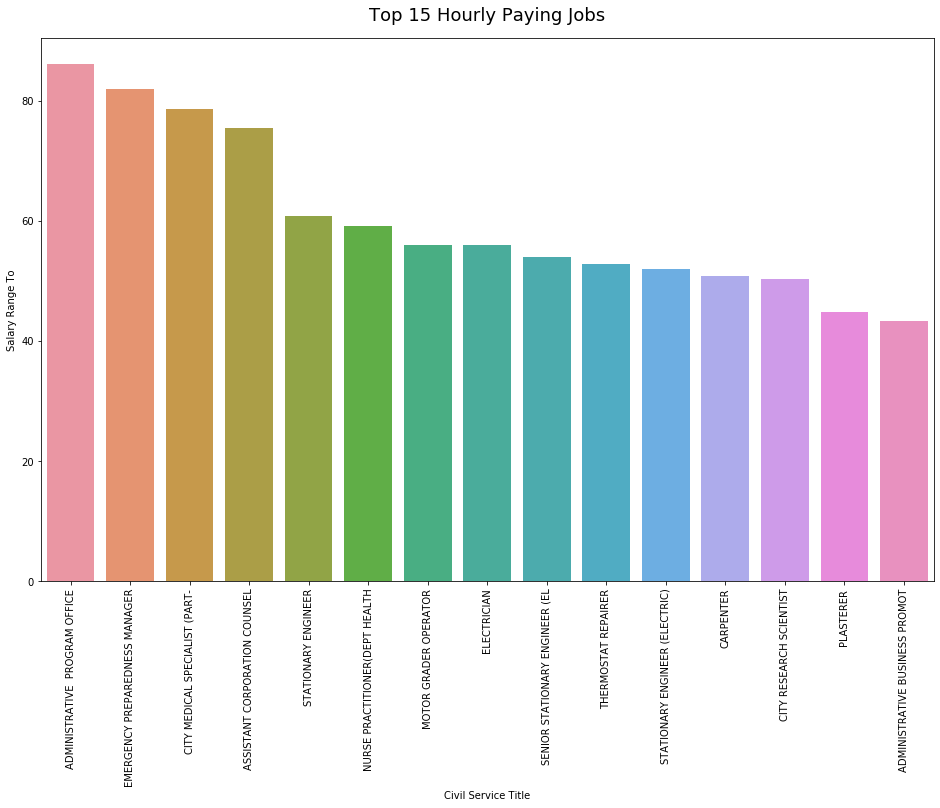

In [26]:
hourly_jobs = jobs[jobs['Salary Frequency'] == 'Hourly'][['Civil Service Title','Salary Range To']]\
.sort_values(by=['Salary Range To'],ascending = False)
highest_hourly = pd.DataFrame(hourly_jobs.groupby(['Civil Service Title'])['Salary Range To'].mean()\
                              .sort_values(ascending=False).head(15).reset_index())
plt.figure(figsize=(16,10))
plt.xticks(rotation = 90)
plt.title('Top 15 Hourly Paying Jobs', fontsize=(18), y = 1.02);
sns.barplot(x='Civil Service Title', y='Salary Range To', data=highest_hourly);

## Full Time Or Part Time

In [27]:
jobs['Full-Time/Part-Time indicator'].value_counts()

F    2743
P     164
Name: Full-Time/Part-Time indicator, dtype: int64

In [28]:
py.iplot([pie_plot(jobs['Full-Time/Part-Time indicator'].value_counts(), 'Full-Time/Part-Time')])

## Civil Service Title

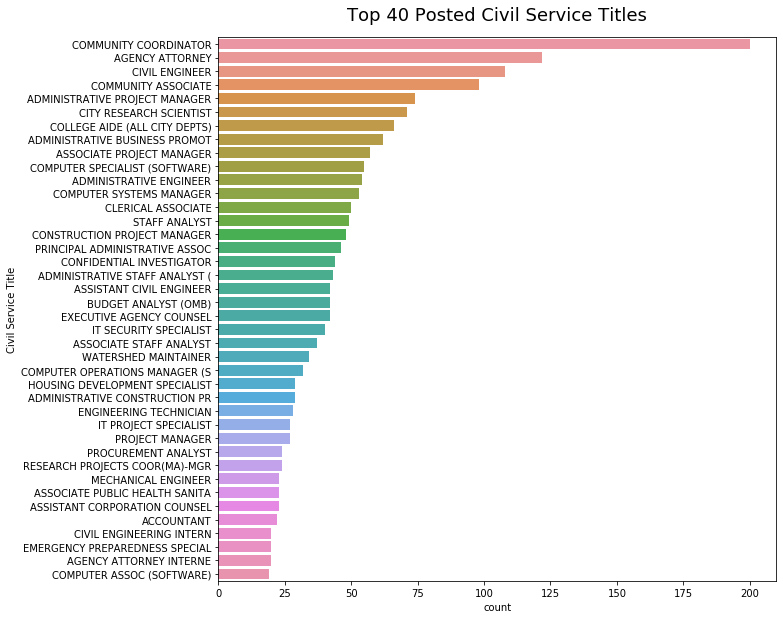

In [29]:
plt.figure(figsize=(10,10))
plt.title('Top 40 Posted Civil Service Titles', fontsize=(18), y = 1.02);
sns.countplot(y='Civil Service Title', data=jobs, order=jobs['Civil Service Title'].value_counts().iloc[:40].index);

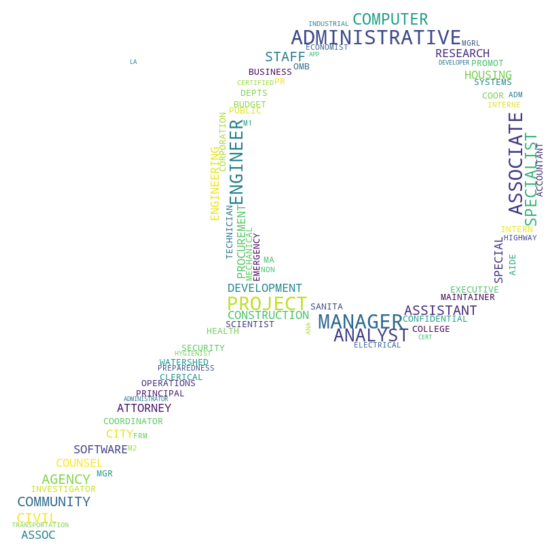

In [30]:
plt.figure(figsize=(16,10))
magnifying_mask = np.array(Image.open("magnifying.jpg"))
wc = WordCloud(background_color="white", max_words=2000, mask=magnifying_mask, width=1000, height = 650)
wc.generate(' '.join(jobs['Civil Service Title'].value_counts().iloc[:50].index.tolist()))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

# Analyzing Data Using NLP

In [31]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [32]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown","new", "york", "city"
            ,"position", "requires", "nan"]
stop_words = stop_words.union(new_words)

In [33]:
def top_title_skills_phrases(title, n=None):
    p_skills = pd.DataFrame(jobs[jobs['Civil Service Title'] == title]['Preferred Skills'].dropna().reset_index())
    body = []
    for i in range(len(p_skills)):
            #Remove strange characters
            text = p_skills['Preferred Skills'][i].encode('ascii',errors='ignore')
            text = text.decode('utf-8')
    
            #Remove punctuations
            text = re.sub('[^a-zA-Z]', ' ', text)
    
            #remove tags
            text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
            # remove special characters and digits
            text=re.sub("(\\d|\\W)+"," ",text)
            
            #Convert to lowercase
            text = text.lower()
    
            ##Convert to list
            text = text.split()
            
            #Lemmatisation
            lem = WordNetLemmatizer()
            text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
            text = " ".join(text)
            body.append(text)
            
    vec = CountVectorizer(ngram_range=(2,3)).fit(body)
    sum_words = vec.transform(body).sum(axis=0) 
    phrases = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    phrases =sorted(phrases, key = lambda x: x[1], 
                       reverse=True)
    return pd.DataFrame(phrases, columns=["Phrase", "Frequancy"])

In [34]:
#wordcloud function 
def wordcloud_plot(title = None):
    wc = WordCloud(background_color="white", max_words=2000, width=1000, height = 650)
    wc.generate(' '.join(top_title_skills_phrases(title)['Phrase'].value_counts().index.tolist()))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
#bar plot function
def bar_plot(title = None):
    plt.figure(figsize=(16,10))
    plt.xticks(rotation = 90)
    plt.title('Top 30 '+title+' Skills', fontsize=(18), y = 1.02)
    sns.barplot(x='Phrase', y='Frequancy', data=top_title_skills_phrases(title)[:30])
    plt.show()

In [35]:
# Top 5 Civil Service Title to test our functions
jobs['Civil Service Title'].value_counts().iloc[:5]

COMMUNITY COORDINATOR             200
AGENCY ATTORNEY                   122
CIVIL ENGINEER                    108
COMMUNITY ASSOCIATE                98
ADMINISTRATIVE PROJECT MANAGER     74
Name: Civil Service Title, dtype: int64

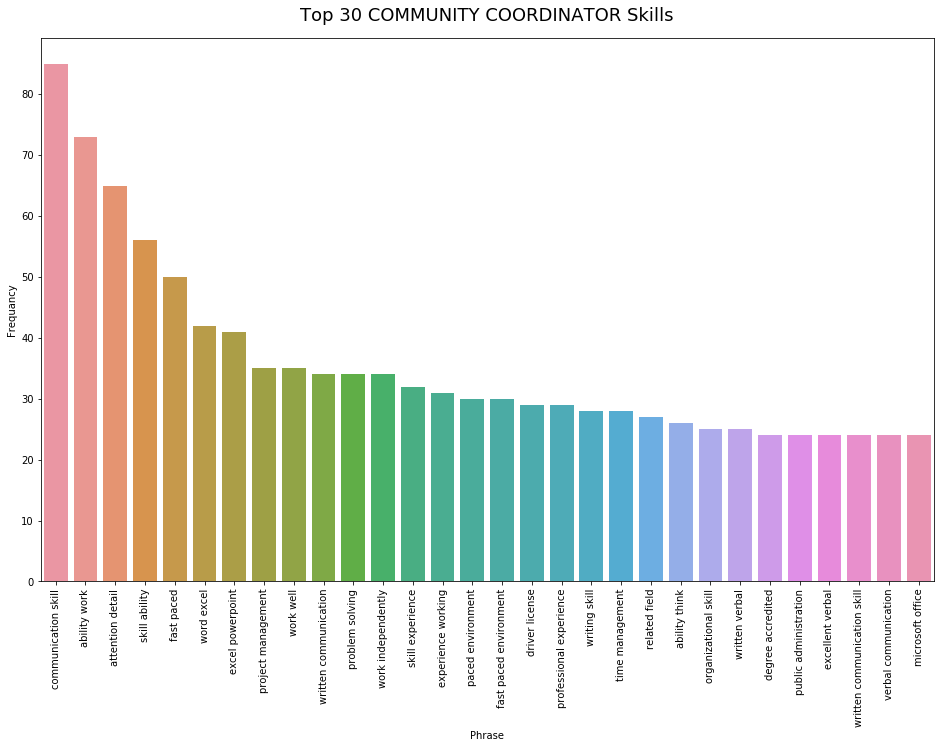

In [36]:
# Bar plot to see top skills for COMMUNITY COORDINATOR
bar_plot('COMMUNITY COORDINATOR')

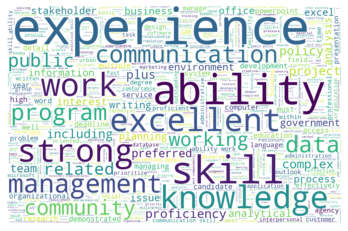

In [37]:
# wordcloud plot to see top skills for COMMUNITY COORDINATOR
wordcloud_plot('COMMUNITY COORDINATOR')

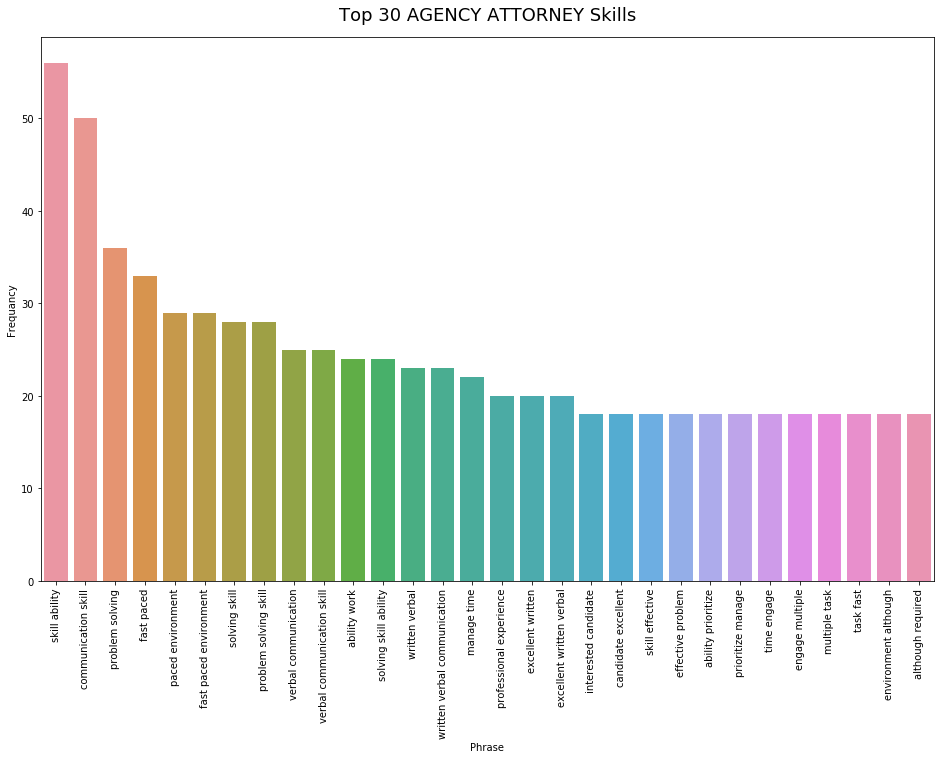

In [38]:
# Bar plot to see top skills for AGENCY ATTORNEY 
bar_plot('AGENCY ATTORNEY')

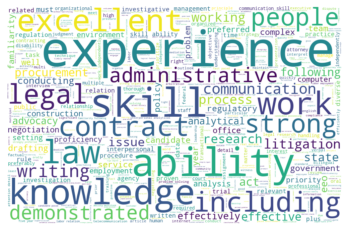

In [39]:
# wordcloud plot to see top skills for AGENCY ATTORNEY
wordcloud_plot('AGENCY ATTORNEY')